<a href="https://colab.research.google.com/github/scskalicky/creative_naming_lsa/blob/main/analyse_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# load in the saved dictionaries

import pickle

#reload saved NES and ROM semantic similarity dictionaries
nes_file = open(r'/content/drive/MyDrive/creative_naming/nes_sims.pkl', 'rb')
nes_sims = pickle.load(nes_file)
nes_file.close()

rom_file = open(r'/content/drive/MyDrive/creative_naming/rom_sims.pkl', 'rb')
rom_sims = pickle.load(rom_file)
rom_file.close()

In [ ]:
len(nes_sims.values())

dict_length = 0
for key in nes_sims.keys():
  dict_length = dict_length + len(nes_sims[key])
  print(dict_length)

### **Easy calculations first, get average similarity for each answer**


In [206]:
import statistics

nes_averages = []

for item in nes_sims.keys():
  for answer in nes_sims[item].keys():
    values = [v for v in nes_sims[item][answer].values()]
    nes_averages.append(['English L1', item, answer, statistics.mean(values)])

In [207]:
rom_averages = []

for item in rom_sims.keys():
  for answer in rom_sims[item].keys():
    values = [v for v in rom_sims[item][answer].values()]
    rom_averages.append(['English L2', item, answer, statistics.mean(values)])

In [208]:
import pandas as pd
nes_summary = pd.DataFrame(nes_averages, columns = ['group', 'item', 'answer', 'avg_sim'])
rom_summary = pd.DataFrame(rom_averages, columns = ['group', 'item', 'answer', 'avg_sim'])

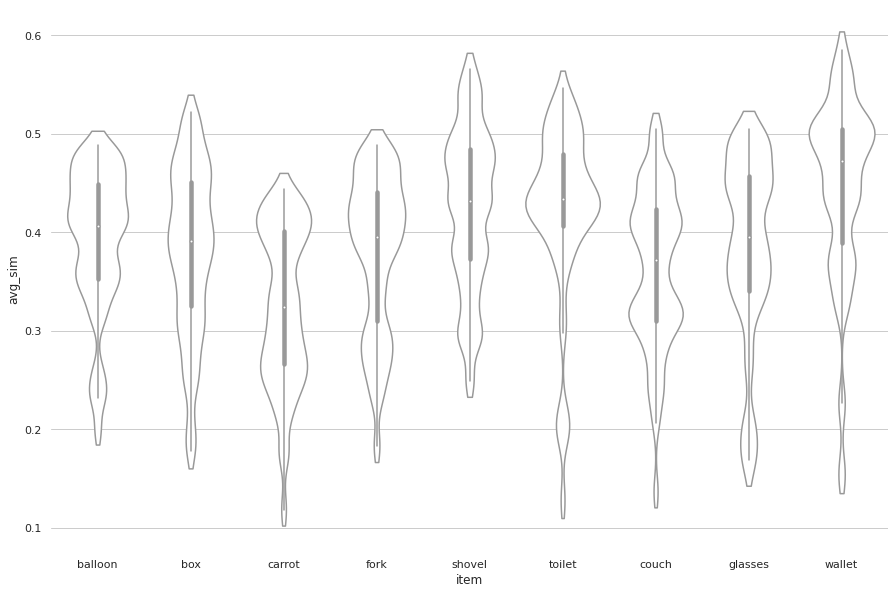

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [15, 10]


nes_avg_sim = nes_summary['avg_sim']
rom_avg_sim = rom_summary['avg_sim']

sns.set_theme(style="whitegrid")

#sns.set_style('white')
#sns.set_context('paper', font_scale=2)

#sns.violinplot(y = nes_summary['avg_sim'], x = nes_summary['item'], palette="Set3", bw = .2, cut = 1)
sns.violinplot(y = nes_summary['avg_sim'], x = nes_summary['item'], bw = .2, cut = 1, color = 'white')

sns.despine(left=True, bottom=True)


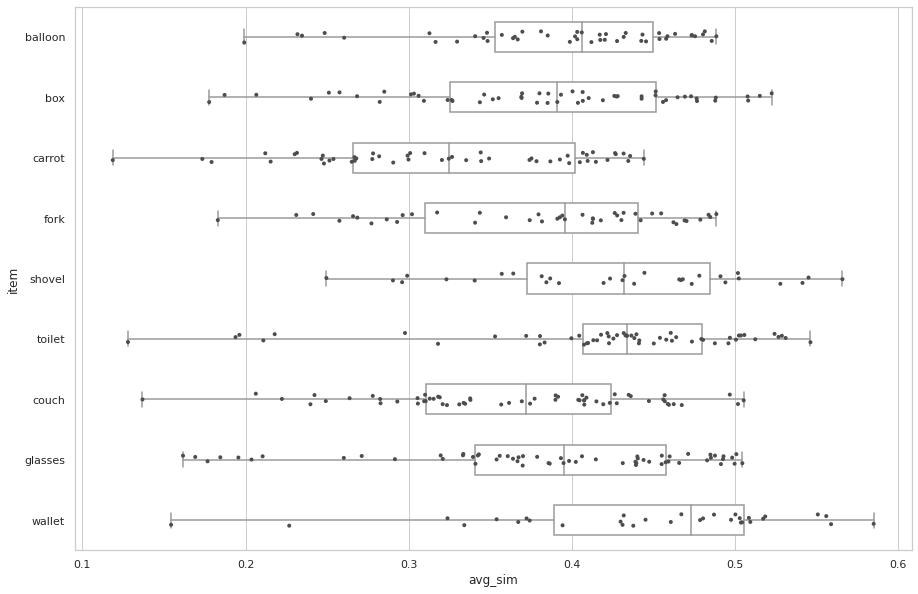

In [210]:
sns.boxplot(x = 'avg_sim', y = 'item', data = nes_summary, whis=[0, 100], width=.5, color = 'white') #palette = "vlag")

sns.stripplot(x = "avg_sim", y = "item", data = nes_summary,
              size=4, color=".3", linewidth=0)

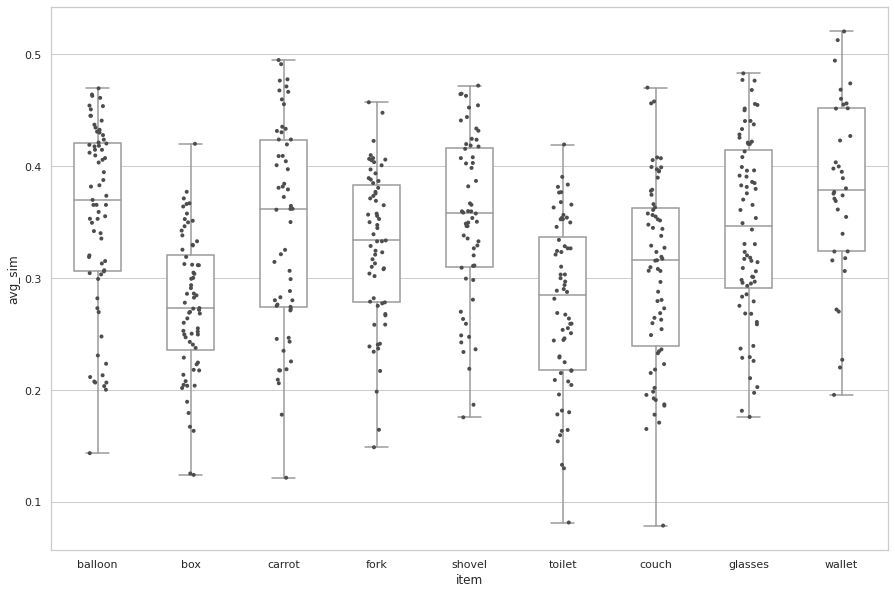

In [211]:
sns.boxplot(y = 'avg_sim', x = 'item', data = rom_summary, whis=[0, 100], width=.5, color = 'white') #palette = "vlag")

sns.stripplot(y = "avg_sim", x = "item", data = rom_summary,
              size=4, color=".3", linewidth=0)

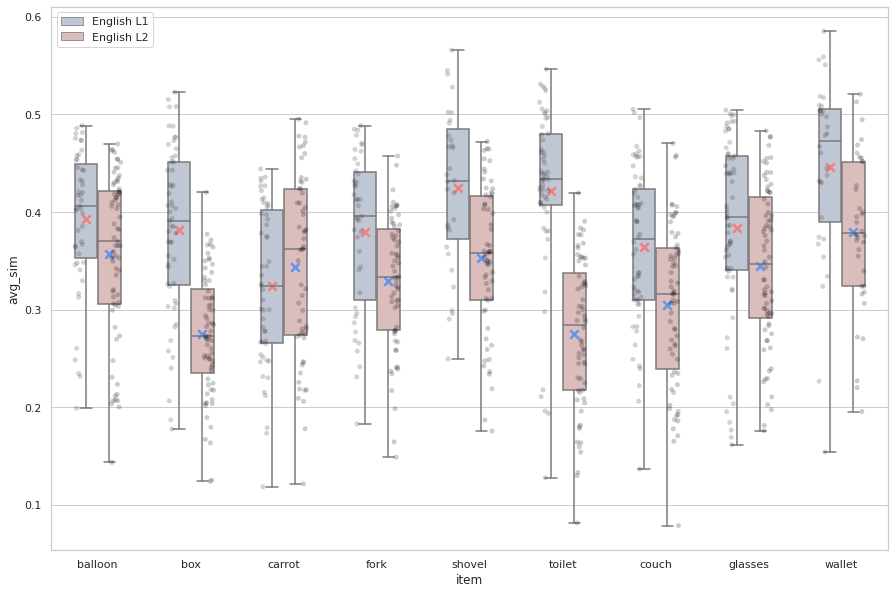

In [242]:
avg_sims = pd.concat([nes_summary, rom_summary])

a = sns.boxplot(y = 'avg_sim', x = 'item', 
                data = avg_sims, hue = 'group', 
                whis = [0, 100], 
                width = .5, 
                palette = "vlag")#,  #boxprops=dict(alpha=.3)) 

sns.stripplot(y = "avg_sim", x = "item", data = avg_sims, 
              hue = 'group', 
              dodge = .9, 
              alpha = .2, 
              color = 'black')
             # palette = {"ROM": 'black', 'NES': 'black'}, )dodge = True, alpha = .2
             # size=4, #color=".3", linewidth=0)


sns.pointplot(x = "item", y = "avg_sim", hue = "group",
              data = avg_sims,
              dodge = .25,
              join = False,
              palette = ['lightcoral','cornflowerblue'],
              markers = 'x', 
              size = 10,
              scale = 1.25, 
              ci = None)


handles, labels = a.get_legend_handles_labels()
a.legend(handles[:2], labels[:2])



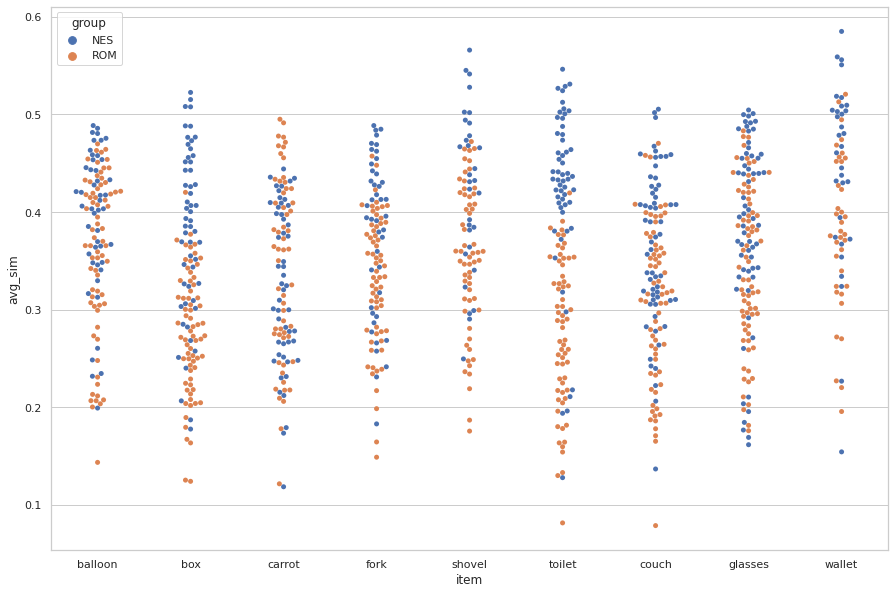

In [127]:
sns.swarmplot(y = "avg_sim", x = "item", data = avg_sims, hue = 'group')


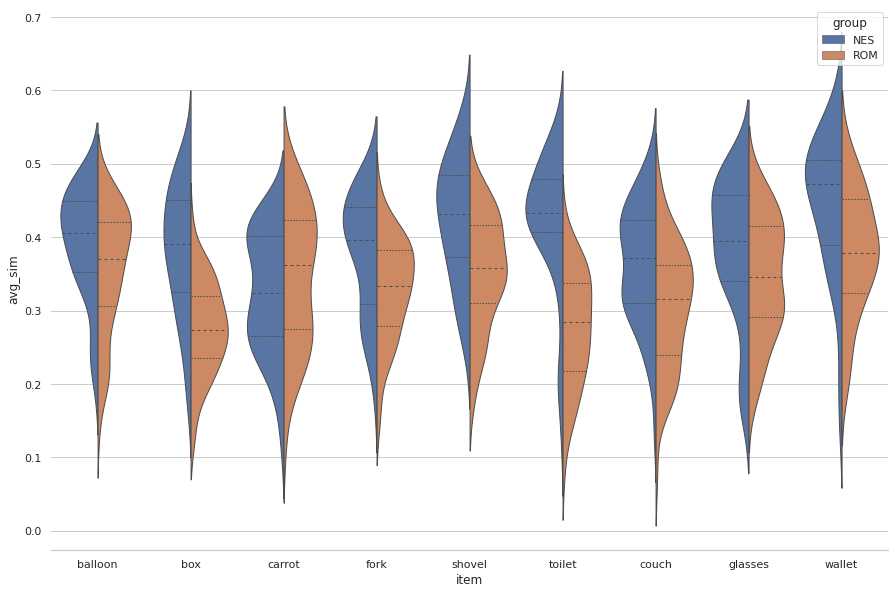

In [113]:
sns.violinplot(data = avg_sims, x = "item", y = "avg_sim", hue = "group",
               split = True, inner = "quart", linewidth=1)
               #palette={"Yes": "b", "No": ".85"})
sns.despine(left=True)

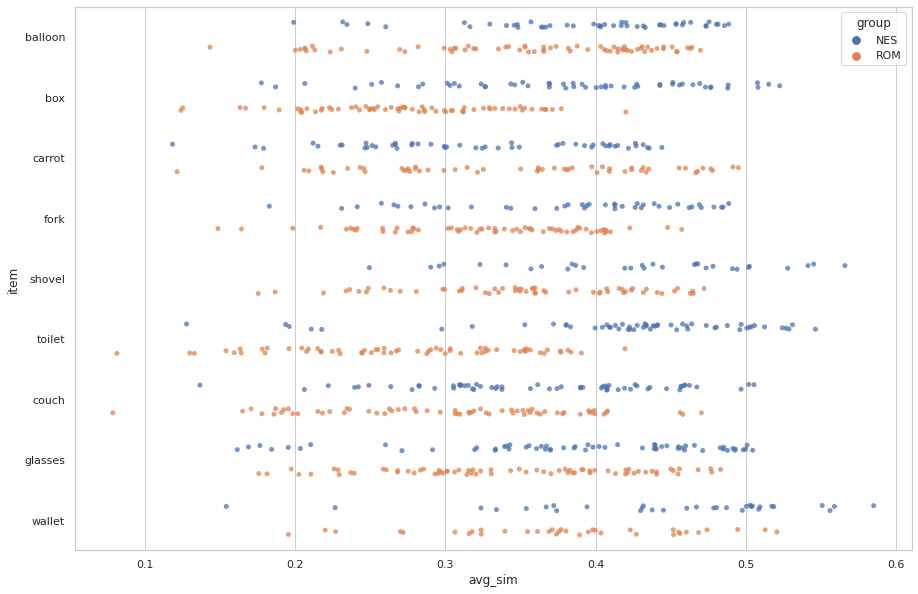

In [132]:
sns.stripplot(x = "avg_sim", y = "item", data = avg_sims, hue = 'group', dodge = True, alpha = .75, zorder = 1)
